In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## [数据集连接](https://www.kaggle.com/competitions/digit-recognizer)

In [2]:
#导入数据集https://www.kaggle.com/competitions/digit-recognizer
numbers = pd.read_csv('../input/train.csv')
numbers.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
numbers.shape

(42000, 785)

In [4]:
#检查数据类型
numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


所有数据类型都是 -int64.

In [5]:
numbers.describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90,0.99])

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,0.129571,...,3.772524,2.748905,1.796452,1.089905,0.563190,0.239571,0.093524,0.024833,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,4.992894,...,26.957829,22.879248,18.595109,14.434439,10.517823,6.469315,3.976306,1.846016,0.139556,0.287891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
5%,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
10%,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [6]:
round(100*(numbers.isnull().sum()/(len(numbers.index))),2).sort_values(ascending = False)

pixel783    0.0
pixel267    0.0
pixel265    0.0
pixel264    0.0
pixel263    0.0
pixel262    0.0
pixel261    0.0
pixel260    0.0
pixel259    0.0
pixel258    0.0
pixel257    0.0
pixel256    0.0
pixel255    0.0
pixel254    0.0
pixel253    0.0
pixel252    0.0
pixel251    0.0
pixel250    0.0
pixel249    0.0
pixel248    0.0
pixel247    0.0
pixel246    0.0
pixel245    0.0
pixel266    0.0
pixel268    0.0
pixel390    0.0
pixel269    0.0
pixel290    0.0
pixel289    0.0
pixel288    0.0
           ... 
pixel495    0.0
pixel494    0.0
pixel493    0.0
pixel492    0.0
pixel491    0.0
pixel512    0.0
pixel513    0.0
pixel514    0.0
pixel526    0.0
pixel535    0.0
pixel534    0.0
pixel533    0.0
pixel532    0.0
pixel531    0.0
pixel530    0.0
pixel529    0.0
pixel528    0.0
pixel527    0.0
pixel525    0.0
pixel515    0.0
pixel524    0.0
pixel523    0.0
pixel522    0.0
pixel521    0.0
pixel520    0.0
pixel519    0.0
pixel518    0.0
pixel517    0.0
pixel516    0.0
label       0.0
Length: 785, dtype: floa

无缺失值

In [7]:
np.unique(numbers['label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
numbers['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

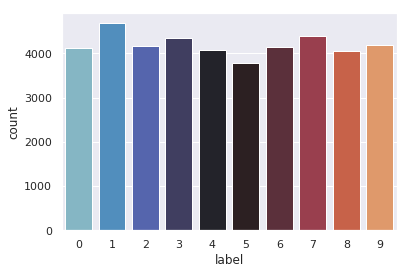

In [9]:
sns.countplot(numbers['label'],palette = 'icefire')

Text(0, 0.5, 'Frequency')

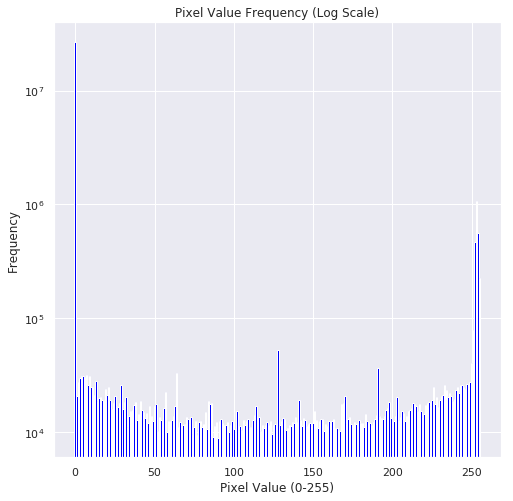

In [10]:
y = pd.value_counts(numbers.values.ravel()).sort_index()
N = len(y)
x = range(N)
width =0.9
plt.figure(figsize=[8,8])
plt.bar(x, y, width, color="blue")
plt.title('Pixel Value Frequency (Log Scale)')
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')

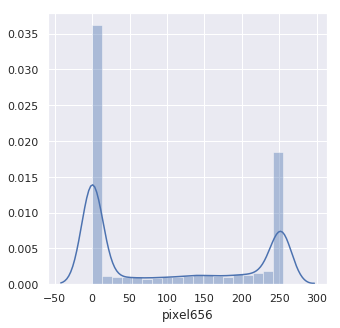

In [11]:
plt.figure(figsize=(5,5))
sns.distplot(numbers['pixel656'])
plt.show()

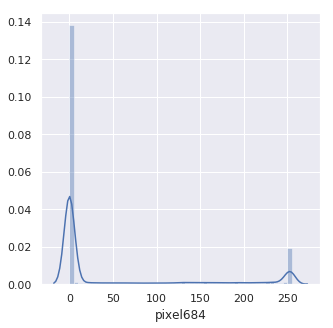

In [12]:
plt.figure(figsize=(5,5))
sns.distplot(numbers['pixel684'])

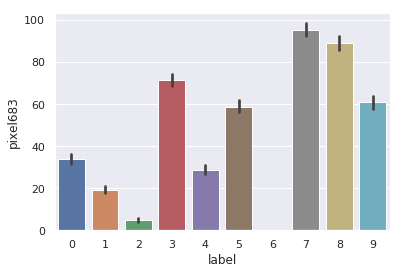

In [13]:
sns.barplot(x='label', y='pixel683', data=numbers)

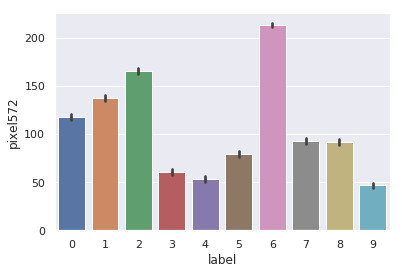

In [14]:
sns.barplot(x='label', y='pixel572', data=numbers)

Text(0.5, 1.0, 'Digit 1')

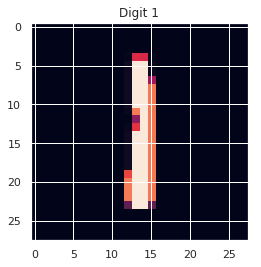

In [15]:
one = numbers.iloc[2, 1:]
one = one.values.reshape(28,28)
plt.imshow(one)
plt.title("Digit 1")

Text(0.5, 1.0, 'Digit 9')

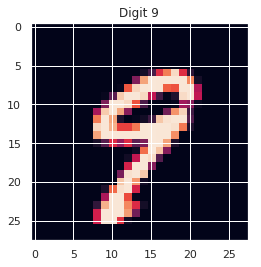

In [16]:
nine = numbers.iloc[11, 1:]
nine = nine.values.reshape(28,28)
plt.imshow(nine)
plt.title("Digit 9")

Text(0.5, 1.0, 'Digit 0')

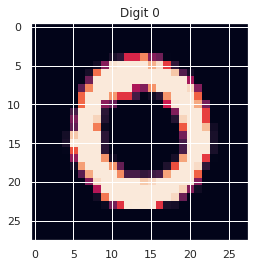

In [17]:
zero = numbers.iloc[1, 1:]
zero = zero.values.reshape(28,28)
plt.imshow(zero)
plt.title("Digit 0")

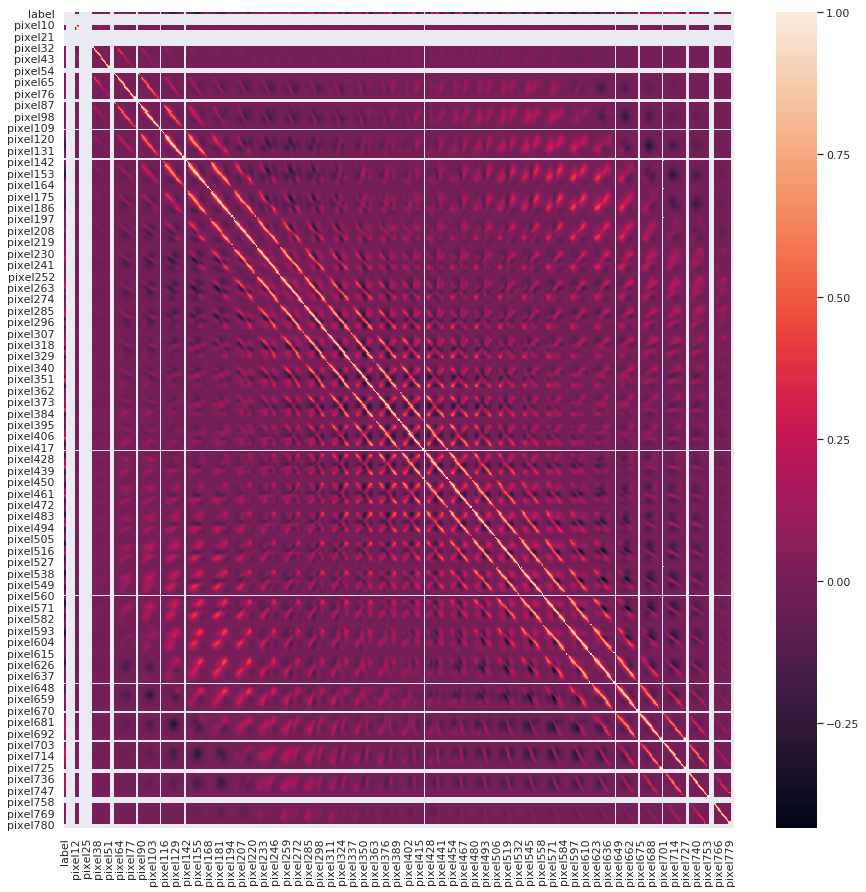

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(data=numbers.corr(),annot=False)

In [19]:
pd.set_option('display.max_rows', 999)
round(numbers.drop('label', axis=1).mean(), 2).sort_values(ascending = False)

pixel407    139.83
pixel435    139.07
pixel408    137.42
pixel434    135.52
pixel211    135.49
pixel210    133.59
pixel602    132.98
pixel212    132.90
pixel436    132.00
pixel601    130.81
pixel380    130.66
pixel406    130.14
pixel409    128.65
pixel381    127.50
pixel463    127.45
pixel575    126.73
pixel603    126.34
pixel209    126.26
pixel629    126.03
pixel462    126.01
pixel213    126.00
pixel574    125.56
pixel183    124.89
pixel379    124.51
pixel237    123.89
pixel238    123.23
pixel433    123.10
pixel628    122.65
pixel600    122.59
pixel240    122.22
pixel239    121.98
pixel184    121.90
pixel630    121.89
pixel241    121.77
pixel437    121.70
pixel464    121.32
pixel236    120.60
pixel182    119.70
pixel576    119.67
pixel547    118.65
pixel353    118.46
pixel548    117.19
pixel573    116.96
pixel242    116.12
pixel491    115.44
pixel461    115.36
pixel405    114.96
pixel352    113.93
pixel627    113.00
pixel208    112.99
pixel214    112.65
pixel492    112.60
pixel519    

In [20]:
X = numbers.drop("label", axis = 1)
y = numbers['label']

In [21]:
X_scaled = scale(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.2,test_size = 0.8, random_state = 101)

In [22]:
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (8400, 784)
y_train shape: (8400,)
X_test shape: (33600, 784)
y_test shape: (33600,)


1. 线性模型

In [23]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

y_pred = model_linear.predict(X_test)

In [24]:

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.913125 

[[3188    0   10    5   11   20   32    3   15    1]
 [   0 3677   14   11    5    7    4    8   30    4]
 [  36   29 3027   54   55   10   30   42   48   12]
 [  13   12  104 3051    9  181    5   21   54   25]
 [   8   14   33    2 3057    4   25   31    6  110]
 [  30   23   29  136   44 2622   44   12   72   27]
 [  26   11   44    4   28   33 3113    0   18    0]
 [   7   24   36   19   59    9    2 3210    4  134]
 [  13   46   50  120   21  110   30   18 2843   21]
 [  19   17   21   22  172   20    4  161   26 2893]]


In [25]:
#precision, recall and f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3285
           1       0.95      0.98      0.97      3760
           2       0.90      0.91      0.90      3343
           3       0.89      0.88      0.88      3475
           4       0.88      0.93      0.91      3290
           5       0.87      0.86      0.87      3039
           6       0.95      0.95      0.95      3277
           7       0.92      0.92      0.92      3504
           8       0.91      0.87      0.89      3272
           9       0.90      0.86      0.88      3355

    accuracy                           0.91     33600
   macro avg       0.91      0.91      0.91     33600
weighted avg       0.91      0.91      0.91     33600



线性模型的准确率为91%。

2.非线性模型

2.1 `Poly` kernel

In [26]:
# poly kernel, C=1

# model
non_linear_model_poly = SVC(kernel='poly')

# fit
non_linear_model_poly.fit(X_train, y_train)

# predict
y_pred = non_linear_model_poly.predict(X_test)

In [27]:

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.87125 

[[2893    0    8    3   38   13   28    0  299    3]
 [   1 3684   11    1   12    0    6    0   43    2]
 [  14   18 2489   37  153    1   11   19  588   13]
 [   0   16   24 2846   27   36    3   13  464   46]
 [   3    8   15    0 3080    8    3    5   17  151]
 [   6    1    5   72   73 2358   30    7  442   45]
 [  16    9   10    0  108   43 2901    2  188    0]
 [   1   41    7    7  138    1    0 2862  105  342]
 [   2   16    6   30   20   40    1    4 3131   22]
 [   6   14    1   13  153    8    0   42   88 3030]]


准确率下降到了 87.12%,低于线性模型。 

2.1 `rbf` kernel

In [28]:
# using rbf kernel, C=1
# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [29]:

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9396428571428571 

[[3195    0   19    5    4   11   32    4   14    1]
 [   0 3689   23   12    8    3    7    6    8    4]
 [  15   15 3144   29   31    5   18   37   43    6]
 [   5    8   92 3191    5   73    6   31   43   21]
 [   3    7   57    1 3099    9   19   21    7   67]
 [  15   10   37   66   16 2776   53   15   32   19]
 [  19    5   46    1   12   31 3149    2   12    0]
 [   6   21   66   11   25    3    0 3285    3   84]
 [  14   24   40   63   14   62   22   19 2996   18]
 [  12   10   38   40   80    6    0   97   24 3048]]


In [30]:
#precision, recall and f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3285
           1       0.97      0.98      0.98      3760
           2       0.88      0.94      0.91      3343
           3       0.93      0.92      0.93      3475
           4       0.94      0.94      0.94      3290
           5       0.93      0.91      0.92      3039
           6       0.95      0.96      0.96      3277
           7       0.93      0.94      0.94      3504
           8       0.94      0.92      0.93      3272
           9       0.93      0.91      0.92      3355

    accuracy                           0.94     33600
   macro avg       0.94      0.94      0.94     33600
weighted avg       0.94      0.94      0.94     33600



非线性的rbf模型准确率为 94%。

In [31]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [0.01, 0.001,0.0001],
                     'C': [1, 10, 100]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,n_jobs = -1)      

# fit the model
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 31.2min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [32]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,84.367620,1.762742,12.324918,0.430188,1,0.01,"{'C': 1, 'gamma': 0.01}",0.752381,0.750595,0.747024,0.728571,0.727976,0.741310,0.010784,9,1.000000,0.999851,0.999851,1.000000,1.000000,0.999940,0.000073
1,20.819661,0.411619,6.628307,0.262175,1,0.001,"{'C': 1, 'gamma': 0.001}",0.935119,0.926786,0.935119,0.932143,0.925000,0.930833,0.004216,3,0.972321,0.971429,0.971429,0.972173,0.973214,0.972113,0.000663
2,30.151873,0.218754,9.144978,0.407284,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.910119,0.905952,0.907738,0.895833,0.895833,0.903095,0.006075,6,0.916518,0.917708,0.916518,0.921577,0.919940,0.918452,0.002001
3,86.761612,0.401297,12.155442,0.426168,10,0.01,"{'C': 10, 'gamma': 0.01}",0.766071,0.772619,0.765476,0.751190,0.747024,0.760476,0.009705,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,18.081381,0.613462,5.769332,0.109592,10,0.001,"{'C': 10, 'gamma': 0.001}",0.941071,0.938690,0.945833,0.936905,0.934524,0.939405,0.003865,1,0.999405,0.999554,0.999405,0.999107,0.999256,0.999345,0.000152
5,13.801938,0.489467,5.399836,0.266634,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.933929,0.923214,0.931548,0.925595,0.922024,0.927262,0.004678,4,0.957887,0.959970,0.959375,0.957738,0.959077,0.958810,0.000865
6,87.243726,0.804418,12.204998,0.360732,100,0.01,"{'C': 100, 'gamma': 0.01}",0.766071,0.772619,0.765476,0.751190,0.747024,0.760476,0.009705,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,18.228908,0.533159,5.762433,0.181578,100,0.001,"{'C': 100, 'gamma': 0.001}",0.939881,0.936905,0.946429,0.936310,0.936905,0.939286,0.003783,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,10.635664,0.614903,4.286536,0.140301,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.929762,0.923810,0.925595,0.928571,0.920238,0.925595,0.003409,5,0.994345,0.994494,0.994940,0.993006,0.994196,0.994196,0.000645


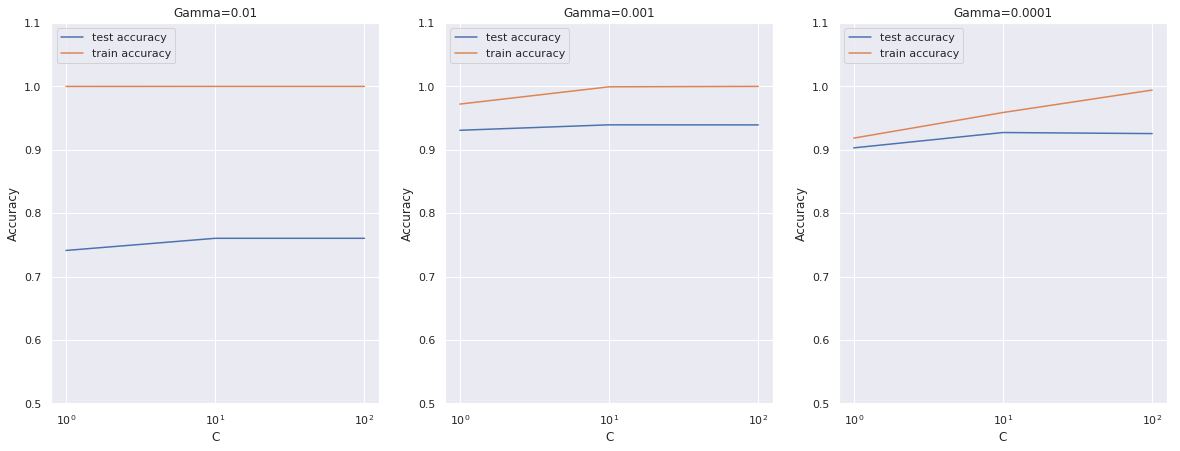

In [33]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

# 画图
plt.figure(figsize=(20,7))

# 子图 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# 子图 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# 子图 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [34]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("最佳准确率得分为 {0} ，对应的超参为 {1}".format(best_score, best_hyperparams))

最佳准确率得分为 0.9394047619047619 ，对应的超参为 {'C': 10, 'gamma': 0.001}


#### 构建和评估最终模型。

In [35]:

# 模型
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 评价标准
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9477083333333334 

[[3211    0   19    2    2   12   26    3    8    2]
 [   0 3692   26    9    6    3    5    9    7    3]
 [  13   12 3165   29   29    6   20   40   21    8]
 [   4    5   77 3232    4   79    1   23   31   19]
 [   5    8   42    1 3117    5   20   19    9   64]
 [  15    8   33   61   15 2815   35   11   31   15]
 [  19    5   44    1   12   18 3167    1   10    0]
 [   5   17   52   12   29    4    1 3322    4   58]
 [   7   16   42   53   15   51   18   16 3044   10]
 [   9    9   33   20   81   10    0   94   21 3078]] 



In [36]:
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3285
           1       0.98      0.98      0.98      3760
           2       0.90      0.95      0.92      3343
           3       0.95      0.93      0.94      3475
           4       0.94      0.95      0.94      3290
           5       0.94      0.93      0.93      3039
           6       0.96      0.97      0.96      3277
           7       0.94      0.95      0.94      3504
           8       0.96      0.93      0.94      3272
           9       0.95      0.92      0.93      3355

    accuracy                           0.95     33600
   macro avg       0.95      0.95      0.95     33600
weighted avg       0.95      0.95      0.95     33600



在超参数C = 10和gamma = 0.001的情况下，模型的整体准确率为95％，而且每个标签的精确度都在94％以上

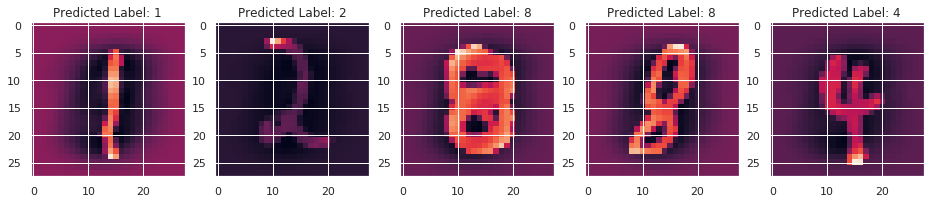

In [37]:
# 可视化

df = np.random.randint(1,y_pred.shape[0]+1,5)

plt.figure(figsize=(16,4))
for i,j in enumerate(df):
    plt.subplot(150+i+1)
    d = X_test[j].reshape(28,28)
    plt.title(f'Predicted Label: {y_pred[j]}')
    plt.imshow(d)
plt.show()

#### 测试集上评估效果

In [38]:
test_df = pd.read_csv('../input/test.csv')
test_df.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
test_df.shape

(28000, 784)

In [40]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [41]:
test_scaled = scale(test_df)

In [42]:
test_predict = model.predict(test_scaled)

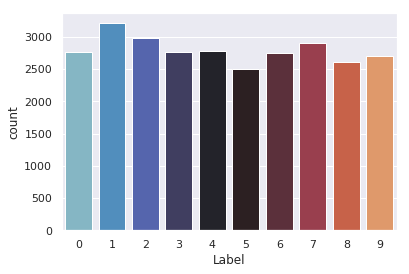

In [43]:
a = {'ImageId': np.arange(1,test_predict.shape[0]+1), 'Label': test_predict}
data_to_export = pd.DataFrame(a)
sns.countplot(data_to_export['Label'], palette = 'icefire')

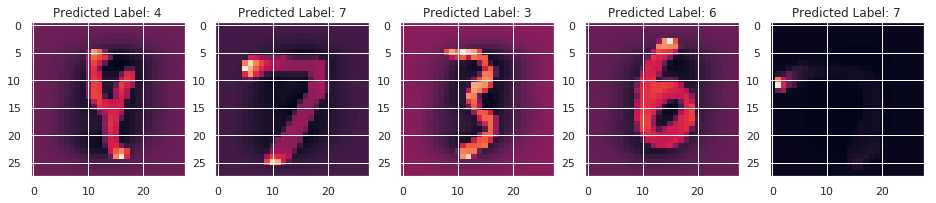

In [44]:
df = np.random.randint(1,test_predict.shape[0]+1,5)

plt.figure(figsize=(16,4))
for i,j in enumerate(df):
    plt.subplot(150+i+1)
    d = test_scaled[j].reshape(28,28)
    plt.title(f'Predicted Label: {test_predict[j]}')
    plt.imshow(d)
plt.show()

In [45]:
data_to_export.to_csv(path_or_buf='submission.csv', index=False)